In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import pygwalker as pyg

In [2]:
# To know the path for our file 

import os

for path, _, files in os.walk(r'C:\Users\HP\Downloads\archive'):
    for file in files:
        print(os.path.join(path,file))
        


C:\Users\HP\Downloads\archive\Nigeria Economy.xlsx


In [3]:
# reading excel file with pandas
nig = pd.read_excel(r"C:\Users\HP\Downloads\Nigeria Econom.xlsx")
nig # Display

,President,Year,Inflation rate,Unemployment,Government debt,Agriculture,Industry,Services,GDP at 2010 Constant Basic Prices,NetTaxesOnProducts,GDP at 2010 Constant Market Prices
0,Ibrahim Babangida,1990,0.0740,0.0560,0.717,3464.72,11148.10,6849.92,21462.73,217.47,21680.20
1,Ibrahim Babangida,1991,0.1301,0.0410,0.750,3590.84,10910.56,7038.21,21539.61,218.28,21757.90
2,Ibrahim Babangida,1992,0.4460,0.0410,0.702,3674.79,11578.98,7283.32,22537.10,228.45,22765.55
3,Ibrahim Babangida,1993,0.5720,0.0410,0.710,3743.67,10790.31,7544.10,22078.07,224.17,22302.24
4,Sani Abacha,1994,0.5703,0.0410,0.559,3839.68,10151.70,7685.48,21676.85,220.62,21897.47
5,Sani Abacha,1995,0.7284,0.0410,0.340,3977.38,9845.97,7837.13,21660.49,221.07,21881.56
6,Sani Abacha,1996,0.2930,0.0400,0.252,4133.55,10402.19,8033.13,22568.87,230.83,22799.69
7,Sani Abacha,1997,0.1070,0.0400,0.241,4305.68,10599.70,8325.74,23231.12,238.22,23469.34
8,Sani Abacha,1998,0.0790,0.0400,0.223,4475.24,10641.26,8713.25,23829.76,245.39,24075.15
9,Abdulsalami Abubakar,1999,0.0660,0.0400,0.649,4703.64,10201.81,9062.14,23967.59,248.18,24215.78


In [4]:
# Change Year to Datetime format 
nig['Year'] = pd.to_datetime(nig['Year'], format = '%Y')
# Check the Dataset Information
nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   President                           34 non-null     object        
 1   Year                                34 non-null     datetime64[ns]
 2   Inflation rate                      34 non-null     float64       
 3   Unemployment                        34 non-null     float64       
 4   Government debt                     34 non-null     float64       
 5   Agriculture                         34 non-null     float64       
 6   Industry                            34 non-null     float64       
 7   Services                            34 non-null     float64       
 8   GDP at 2010 Constant Basic Prices   34 non-null     float64       
 9   NetTaxesOnProducts                  34 non-null     float64       
 10  GDP at 2010 Constant Market 

In [5]:
# Check first 5 rows of data
nig.head()

,President,Year,Inflation rate,Unemployment,Government debt,Agriculture,Industry,Services,GDP at 2010 Constant Basic Prices,NetTaxesOnProducts,GDP at 2010 Constant Market Prices
0,Ibrahim Babangida,1990-01-01,0.0740,0.056,0.717,3464.72,11148.10,6849.92,21462.73,217.47,21680.20
1,Ibrahim Babangida,1991-01-01,0.1301,0.041,0.750,3590.84,10910.56,7038.21,21539.61,218.28,21757.90
2,Ibrahim Babangida,1992-01-01,0.4460,0.041,0.702,3674.79,11578.98,7283.32,22537.10,228.45,22765.55
3,Ibrahim Babangida,1993-01-01,0.5720,0.041,0.710,3743.67,10790.31,7544.10,22078.07,224.17,22302.24
4,Sani Abacha,1994-01-01,0.5703,0.041,0.559,3839.68,10151.70,7685.48,21676.85,220.62,21897.47


In [6]:
# Check last 5 rows
nig.tail()

,President,Year,Inflation rate,Unemployment,Government debt,Agriculture,Industry,Services,GDP at 2010 Constant Basic Prices,NetTaxesOnProducts,GDP at 2010 Constant Market Prices
29,Muhammadu Buhari,2019-01-01,0.114,0.0853,0.292,17958.58,15882.35,37546.90,71387.83,706.27,72094.09
30,Muhammadu Buhari,2020-01-01,0.132,0.3330,0.345,18348.18,14953.72,36712.48,70014.37,786.17,70800.54
31,Muhammadu Buhari,2021-01-01,0.170,0.3500,0.366,18738.41,14883.77,38771.49,72393.67,989.10,73382.77
32,Muhammadu Buhari,2022-01-01,0.189,0.3770,0.374,19091.07,14195.58,41352.81,74639.47,1129.48,75768.95
33,Muhammadu Buhari,2023-01-01,0.173,0.4060,0.386,3844.85,3735.98,10169.24,17750.06,244.22,17994.28


# Introduction to the Nigeria Economy Dataset

The Nigeria Economy dataset spans from 1990 to 2023 and comprises 11 columns. Each column represents a specific aspect of the Nigerian economy. Here’s a brief overview of the columns:

* President: This column contains name of presidents .

* Year: The year column represents the calendar year for which the economic data is recorded. It serves as a temporal reference.

* Inflation Rate: This column tracks the annual percentage change in the general price level of goods and services. High inflation rates can impact purchasing power and economic stability.

* Unemployment: The unemployment rate indicates the proportion of the labor force that is actively seeking employment but remains jobless. It reflects economic conditions and workforce dynamics.

* Government Debt: This column contains data on Nigeria’s public debt, including both domestic and external debt. Government debt affects fiscal policy and economic sustainability.

* Agriculture: Agriculture plays a crucial role in Nigeria’s economy. This column includes information related to agricultural production.

* Industry: The industry sector encompasses manufacturing, mining, and other industrial activities. This column provide insights into industrial growth and development.

* Services: The services sector covers various non-industrial economic activities such as trade, finance, and tourism. This column reveal trends in service-oriented industries.

* GDP at 2010 Constant Basic Prices: Gross Domestic Product (GDP) measures the total value of goods and services produced within a country. This column focuses on GDP calculated at constant basic prices, adjusted for inflation.

* Net Taxes on Products: Taxes on products contribute to government revenue. This column includes data on indirect taxes levied on goods and services.

* GDP at 2010 Constant Market Prices: Similar to the previous GDP column, this one represents GDP at constant market prices. It considers market fluctuations and inflation adjustments.

In [7]:
nig.describe()

,Year,Inflation rate,Unemployment,Government debt,Agriculture,Industry,Services,GDP at 2010 Constant Basic Prices,NetTaxesOnProducts,GDP at 2010 Constant Market Prices
count,34,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2006-07-02 12:00:00,0.180641,0.099421,0.338647,10168.294118,12804.397647,20523.631765,43496.323529,492.407059,43988.730294
min,1990-01-01 00:00:00,0.054000,0.038000,0.073000,3464.720000,3735.980000,6849.920000,17750.060000,217.470000,17994.280000
25%,1998-04-02 06:00:00,0.094250,0.039250,0.184500,4348.070000,10923.630000,8800.472500,23380.780000,244.512500,23620.792500
50%,2006-07-02 12:00:00,0.129550,0.041000,0.284500,9869.730000,13145.090000,16195.390000,39541.240000,410.610000,39951.845000
75%,2014-10-01 18:00:00,0.172250,0.097500,0.430000,15222.922500,14944.827500,34469.112500,66169.272500,723.387500,66968.807500
max,2023-01-01 00:00:00,0.728400,0.406000,0.750000,19091.070000,16742.150000,41352.810000,74639.470000,1129.480000,75768.950000
std,NaN,0.158712,0.108130,0.203102,5613.250422,2620.145710,12487.795389,20241.289326,266.513444,20496.749889


In [8]:
# Check if we have null in our dataset
nig.isna().count()

President                             34
Year                                  34
Inflation rate                        34
Unemployment                          34
Government debt                       34
Agriculture                           34
Industry                              34
Services                              34
GDP at 2010 Constant Basic Prices     34
NetTaxesOnProducts                    34
GDP at 2010 Constant Market Prices    34
dtype: int64

In [9]:
# Check if we have duplicate in our dataset
nig.duplicated().sum()

0

In [10]:
# columns 
nig.columns

Index(['President', 'Year', 'Inflation rate', 'Unemployment',
       'Government debt', 'Agriculture', 'Industry', 'Services',
       'GDP at 2010 Constant Basic Prices', 'NetTaxesOnProducts',
       'GDP at 2010 Constant Market Prices'],
      dtype='object')

# Data Analysis
Throughout the past decades, Nigeria has seen the leadership of seven distinguished individuals, each contributing their unique perspective and approach to governance. Let's take a closer look at how these Presidents have navigated the challenging waters of inflation during their respective tenures.

Ibrahim Babangida gorvened the country from year 1985 to 1993, which this dataset covered the last 4 years of his administration, with his four-years term, faced the task of navigating Nigeria through economic uncertainties. Despite the challenges, Babangida inflation rate over the year 1990 down to 1993 1.2221.

Among these leaders, Sani Abacha's presidency stands so high with an inflation rate of 1.7777 during his five-year tenure. Despite his ambitious economic agendas, Abacha's presidency was marked by controversies and challenges in managing inflation.

Leading the pack in terms of inflation management is Abdulsalami Abubakar, who served for a brief but impactful year (1). Under his leadership, Nigeria experienced a relatively modest inflation rate of 0.0660, reflecting stable economic conditions during his tenure.

The tenure of Olusegun Obasanjo, spanning eight years, saw Nigeria navigating various economic challenges with resilience. Despite facing inflationary pressures, Obasanjo's leadership yielded a relatively modest inflation rate of 0.9920, reflecting his adept handling of economic policy.

Musa Yar'Adua, during his three-year presidency, tackled inflation with a pragmatic approach, resulting in a rate of 0.3780. His focus on social welfare and infrastructure development helped mitigate inflationary pressures, laying the groundwork for sustainable growth.

Following closely behind is the dynamic leadership of Goodluck Jonathan, who held office for five years. Despite facing various economic challenges, Jonathan managed to keep inflation at a manageable level, with a rate of 0.4850. His prudent economic policies played a crucial role in maintaining stability during his presidency.

In the subsequent years, Nigeria witnessed the leadership of Muhammadu Buhari, whose eight-year tenure saw a moderate inflation rate of 1.2210 compare to Sani's high inflation and almost the same with 4 year of Babangida. Buhari's tenure was marked by efforts to address corruption and improve economic diversification, But due to the other factors that contribute to overall instability in the inflation rate.

In [11]:
# The numbers of nigeria President
president = nig["President"].nunique()

print(f"Nigeria have {president} Head of State/President since 1990 to 2023")

Nigeria have 7 Head of State/President since 1990 to 2023


In [12]:
# Count to get year for each President
President_year = nig.groupby("President")["Year"].count()
# Display
President_year

President
Abdulsalami Abubakar    1
Goodluck Jonathan       5
Ibrahim Babangida       4
Muhammadu Buhari        8
Musa Yar'Adua           3
Olusegun Obasanjo       8
Sani Abacha             5
Name: Year, dtype: int64

In [13]:
# Sum of inflation rate for each President
President_inflation = nig.groupby("President")["Inflation rate"].sum()
# Sort it in Decending order
President_inflation.sort_values(ascending = False, inplace = True)
# Display
President_inflation

President
Sani Abacha             1.7777
Ibrahim Babangida       1.2221
Muhammadu Buhari        1.2210
Olusegun Obasanjo       0.9920
Goodluck Jonathan       0.4850
Musa Yar'Adua           0.3780
Abdulsalami Abubakar    0.0660
Name: Inflation rate, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

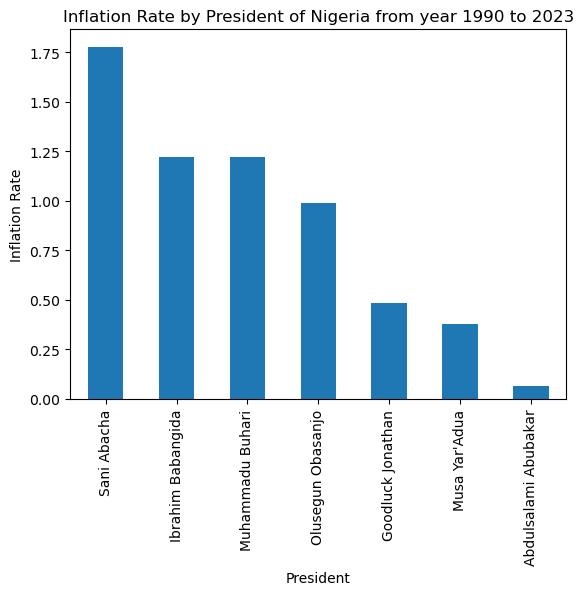

In [14]:
# Plot President using Bar
President_inflation.plot(kind = "bar")
plt.title("Inflation Rate by President of Nigeria from year 1990 to 2023") # Bar title
plt.xlabel("President") # X label
plt.ylabel("Inflation Rate") # Y label
plt.xticks(rotation = 90) # X ticks to be 90 degree
plt.show # diplay our bar

In [15]:
# Group President on Unemployment
President_Unemployment = nig.groupby("President")["Unemployment"].sum()
# Sort in Decending order
President_Unemployment.sort_values(ascending = False, inplace = True)
President_Unemployment # Display 

President
Muhammadu Buhari        2.0863
Goodluck Jonathan       0.4340
Olusegun Obasanjo       0.3120
Sani Abacha             0.2020
Ibrahim Babangida       0.1790
Musa Yar'Adua           0.1270
Abdulsalami Abubakar    0.0400
Name: Unemployment, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

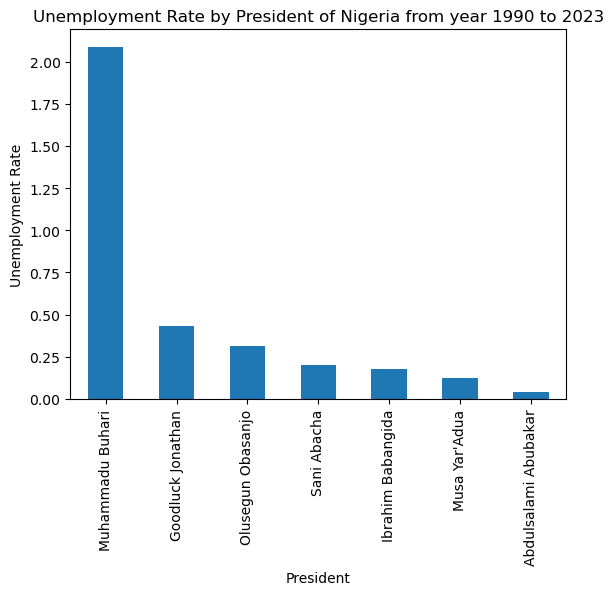

In [16]:
President_Unemployment.plot(kind = "bar")
plt.title("Unemployment Rate by President of Nigeria from year 1990 to 2023")
plt.xlabel("President")
plt.ylabel("Unemployment Rate")
plt.xticks(rotation = 90)
plt.show

# Unemployment


At the helm of Nigeria's leadership stands Muhammadu Buhari, whose eight-year presidency saw the country grappling with unemployment, with a rate of 2.0863. Despite concerted efforts to address unemployment through various initiatives, Buhari faced challenges in generating sufficient job opportunities to meet the growing demands of the population.

Following closely behind is the administration of Goodluck Jonathan, who held office for five years. Jonathan's tenure witnessed a relatively lower unemployment rate of 0.4340, reflecting efforts to stimulate economic growth and create employment opportunities. However, structural challenges and socio-economic disparities persisted, posing hurdles to comprehensive employment solutions.

Olusegun Obasanjo, during his eight-year presidency, navigated Nigeria through various economic transformations, with a commendable unemployment rate of 0.3120. Obasanjo's administration prioritized job creation through strategic investments in infrastructure, agriculture, and human capital development, laying the foundation for sustainable employment growth.

The era of Sani Abacha, spanning five years, saw Nigeria grappling with unemployment at a rate of 0.2020. Despite ambitious economic agendas, Abacha's presidency faced challenges in translating economic growth into tangible employment opportunities, resulting in persistent joblessness across various sectors.

Ibrahim Babangida, with his four-year tenure, addressed unemployment with a rate of 0.1790. Babangida's administration implemented structural reforms aimed at stimulating economic growth and fostering private sector participation, albeit with mixed results in employment generation.

Musa Yar'Adua, during his three-year presidency, tackled unemployment with a rate of 0.1270. Yar'Adua's focus on inclusive growth and social welfare programs aimed to alleviate poverty and create employment opportunities for the Nigerian populace, albeit within a constrained timeframe.

Abdulsalami Abubakar's brief one-year presidency witnessed a commendably low unemployment rate of 0.0400. Abubakar's administration focused on fostering political stability and economic reforms, laying the groundwork for future employment growth and socio-economic development.


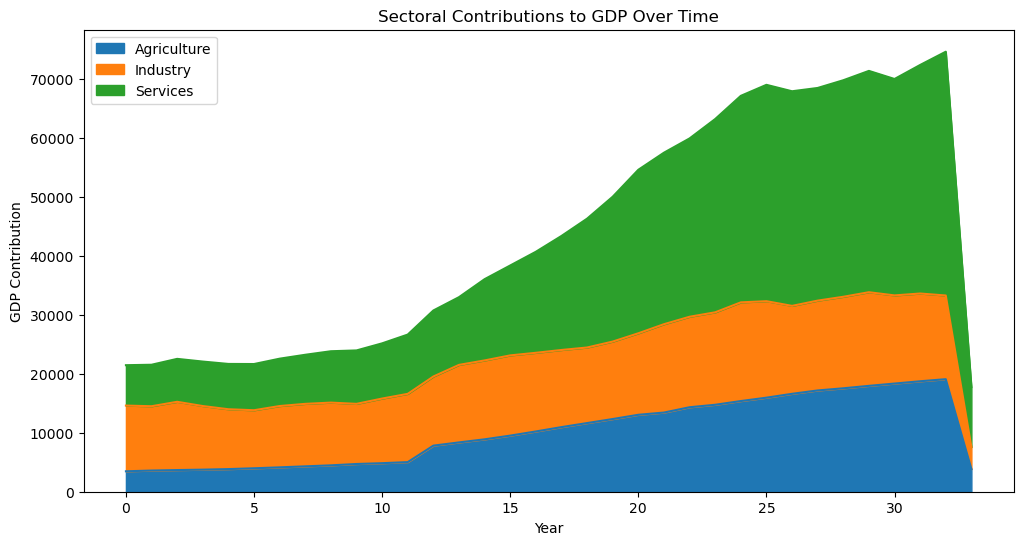

Agriculture    345722.00
Industry       435349.52
Services       697803.48
dtype: float64

In [17]:
# Sectoral Analysis
sectors = ['Agriculture', 'Industry', 'Services']
nig[sectors].plot.area(stacked=True, figsize=(12, 6), title='Sectoral Contributions to GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP Contribution')
plt.show()
nig[sectors].sum()

During the period from 1990 to 2023, Nigeria's economy witnessed significant shifts in the contributions of different sectors to its Gross Domestic Product (GDP). Let's delve into the sectorial contributions to GDP over this period, highlighting key trends and notable developments.

From 1990 to 1995, the Agriculture sector made a modest contribution to GDP, hovering below 5000 units. Meanwhile, the Industry sector maintained a steady contribution in the range of 15000 units, indicating its stable presence in the economy. On the other hand, the Services sector emerged as a dominant force, with contributions exceeding 22000 units, reflecting its pivotal role in driving economic growth and development.

Moving into the late 1990s and early 2000s, we observed some interesting dynamics in sectorial contributions. While Agriculture experienced a slight uptick in its contribution, remaining below 5000 units, the Industry sector began showing signs of growth, particularly towards the end of the decade. By the late 1990s, Industry's contribution reached around 15000 units, signaling its potential for expansion. Meanwhile, the Services sector maintained a substantial contribution, hovering close to 18000 units, indicating its resilience and importance in driving economic activities.

The period from 2000 to 2005 marked a significant turning point in Nigeria's economic landscape. Agriculture, Industry, and Services sectors all experienced notable changes in their contributions to GDP. Agriculture witnessed a gradual increase in its contribution, reaching its peak in the mid-2000s, albeit remaining below 5000 units. Industry's contribution continued to rise steadily, surpassing 15000 units and showing promising growth prospects. However, it was the Services sector that stole the spotlight, experiencing a remarkable surge in its contribution, skyrocketing to unprecedented levels exceeding 22000 units. This surge underscored the pivotal role of the Services sector in driving Nigeria's economic growth and transformation.

As we approach the year 2023, under the administration of Buhari, there was a notable downturn in the performance of all sectors, reflecting a challenging economic environment. The Services sector, which had been a powerhouse of economic activity, experienced a significant decline in its contribution, plummeting from over 70000 units in 2022 to below 15000 units in 2023. This sharp decrease highlighted the vulnerability of the Services sector to economic shocks and policy changes.

Similarly, the Industry sector witnessed a substantial decline in its contribution, falling from a range of 26000 units in 2022 to a range of 6000 units in 2023. This decline underscored the challenges faced by the industrial sector, including issues related to infrastructure, regulatory environment, and market demand.

Furthermore, the Agriculture sector, which had shown some resilience in previous years, also experienced a downturn in its contribution. From contributing around 14000 units in 2022, the Agriculture sector's contribution dropped to 5000 units in 2023. This decline could be attributed to various factors, including adverse weather conditions, inadequate investment, and supply chain disruptions.

# Summary 
In summary, the year 2023 witnessed a significant contraction in the performance of all sectors of Nigeria's economy. The sharp decline in contributions from the Services, Industry, and Agriculture sectors underscored the challenges and vulnerabilities facing the Nigerian economy, requiring strategic interventions and policy reforms to foster sustainable growth and development.

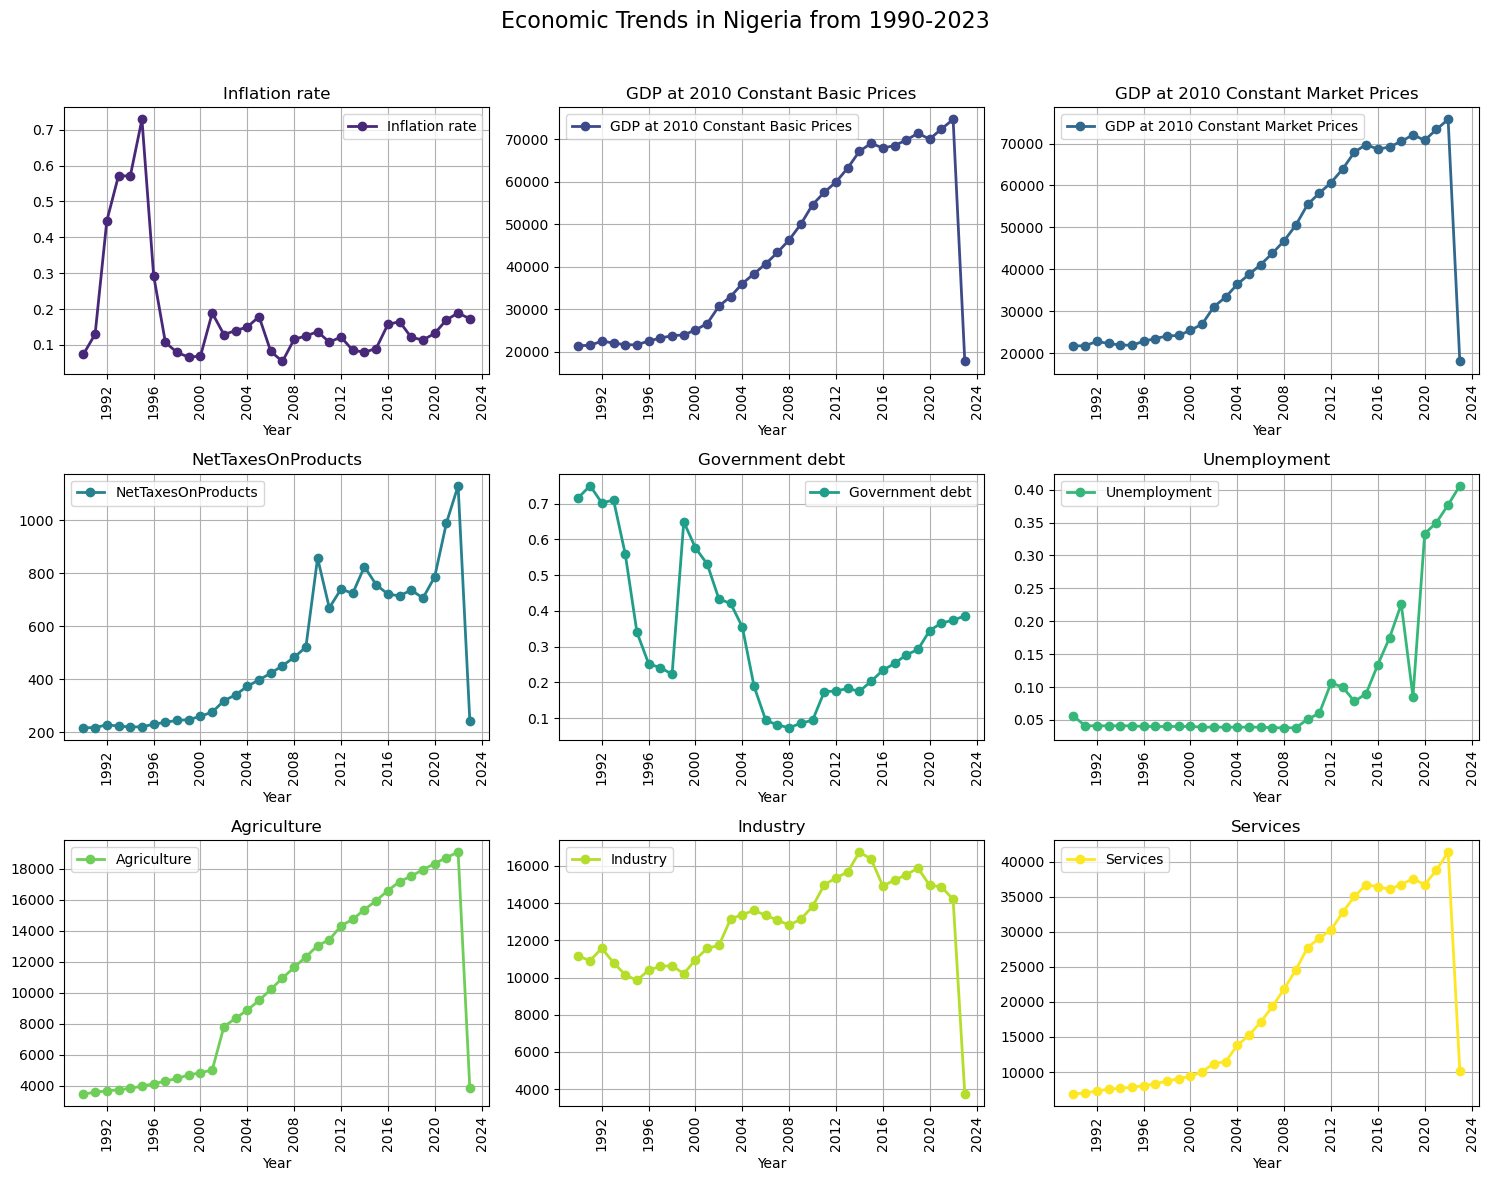

In [18]:
# Set up Subplot grid and entire title for the Subplot
plt.figure(figsize=(15, 12))
plt.suptitle('Economic Trends in Nigeria from 1990-2023', fontsize=16)

# A list of economic indicators to be plotted
economic_indicators = ['Inflation rate', 'GDP at 2010 Constant Basic Prices', 'GDP at 2010 Constant Market Prices', 'NetTaxesOnProducts', 'Government debt', 'Unemployment', 'Agriculture', 'Industry', 'Services']

# Count the number of rows needed in the subplot grid based on the number of economic indicators.
num_subplots = len(economic_indicators)
num_rows = (num_subplots - 1) // 3 + 1  # set each subplot grid to has 3 columns

# Start a loop to iterate through each economic indicator and create subplots. 
# The enumerate function is used to get both the index (i) and the indicator name.
for i, indicator in enumerate(economic_indicators, 1):
    plt.subplot(num_rows, 3, i)
    
    # Select color from the "viridis" colormap based on index of the subplot
    color = plt.cm.viridis(i / num_subplots)
    
    # Plot the data
    plt.plot(nig['Year'], nig[indicator], label=indicator, color=color, marker='o', linewidth=2)
    
    # Set subplot title
    plt.title(indicator)
    
    # Set axis labels and xticks 
    plt.xlabel('Year')
    plt.xticks(rotation=90)
    
    # Display grid
    plt.grid(True)
    
    # Add legend
    plt.legend(loc='best')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Inflation:
The inflation rate in Nigeria experienced significant fluctuations over the years. Beginning below 0.1 in 1990, it surged to highs between 1992 and 1995, peaking above 0.7. A drastic downturn occurred in 1996, stabilizing around 0.1 until 1997. From 1997 to 2023, inflation maintained a relatively steady range between 0.1 to 0.2, indicating relative price stability over the long term.

GDP at 2010 Constant Basic Prices:
The GDP at constant basic prices reflects the value of goods and services produced in Nigeria, adjusted for inflation. It remained relatively stagnant around 20,000 units until 1996 when it began a gradual ascent. The growth trajectory was steady, reaching a peak of over 70,000 units before declining sharply in 2023 to around 10,000 units. This decline in GDP suggests a contraction in economic activity, possibly influenced by external factors or internal challenges.

Net Taxes on Products:
Similar to the GDP trend, net taxes on products exhibited a pattern of growth followed by a decline in 2023. This indicates a decrease in government revenue from taxes on goods and services, potentially reflecting changes in taxation policies or economic downturns affecting consumption and production.

Government Debt:
The level of government debt in Nigeria fluctuated significantly over the years. Initially high, above 0.7 from 1990 to 1993, it gradually decreased to a range of 0.2 to 0.4 between 1994 and 1998. A sharp increase occurred in 1999, reaching a range of 0.6 to 0.7, possibly due to increased borrowing or fiscal policies. From 2000 to 2008, government debt declined steadily, dropping below 0.1. However, it began to rise again from 2010, reaching 0.4 in 2023, signaling potential fiscal challenges and increased borrowing.

Unemployment:
The unemployment rate in Nigeria remained relatively low, around 0.05, until 2009. From 2010 onwards, there was a gradual increase, with the rate exceeding 0.1 by 2010 and rising to 0.23 by 2018. A slight decline occurred in 2019, but unemployment surged again in 2020, reaching 0.34 in 2023. This upward trend suggests challenges in job creation and labor market dynamics, potentially influenced by economic conditions and policy interventions.

<function matplotlib.pyplot.show(close=None, block=None)>

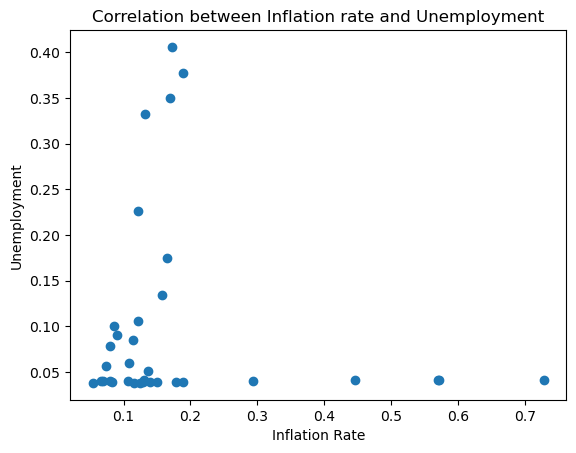

In [19]:
# Scatter plot Inflation Rate vs Unemployment
plt.scatter(nig["Inflation rate"], nig["Unemployment"])
plt.title("Correlation between Inflation rate and Unemployment")
plt.xlabel("Inflation Rate")
plt.ylabel("Unemployment")
plt.show

### Inflation rate and Unemployment rate.

The x-axis—the horizontal line. It represents the inflation rate. Think of it as the temperature gauge for prices. When it’s low (around 0.1 to 0.3), prices are cool, like a gentle breeze. But as it climbs, things heat up—prices rise faster than a summer sun.
Now, shift your gaze to the y-axis—the vertical line. It’s our unemployment meter. When it’s low (around 0.05 to 0.10), people have jobs—they’re busy bees in the economic hive.
But watch what happens as we move up the axis. Unemployment creeps in like a shadow—it’s harder to find work.
See those blue dots? Each one tells a story. Most of them huddle together at the lower left corner. It’s like a cozy gathering—low inflation and low unemployment. Imagine a picnic on a sunny day—everyone’s happy.
But look closely. As the inflation rate climbs (those dots spread out), unemployment tags along. It’s like a seesaw—one side goes up, the other follows. When prices rise too fast, jobs slip away.
Notice how fewer dots appear as inflation spikes? It’s like a game of hide-and-seek. High inflation scares away jobs. People tighten their belts, businesses hesitate to hire, and the economy stumbles.
But when inflation cools down, more dots reappear.

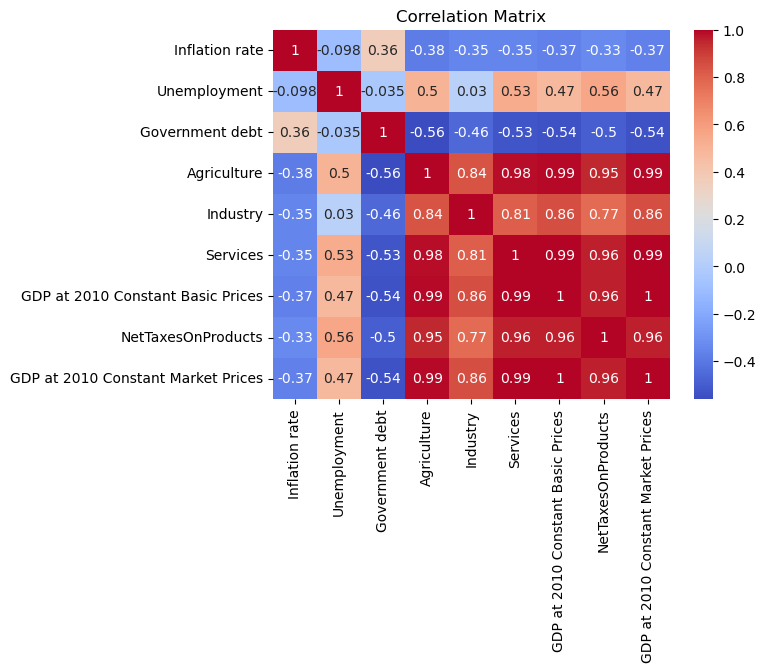

In [20]:
# Correlation Analysis
nig_num = nig.select_dtypes(include=['int64', 'float64']).columns # To remove none numerica columns 

correlation_matrix = nig[nig_num].corr() # To get the correlation
# Using seaborn to create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix') # Title 
plt.show() # Display

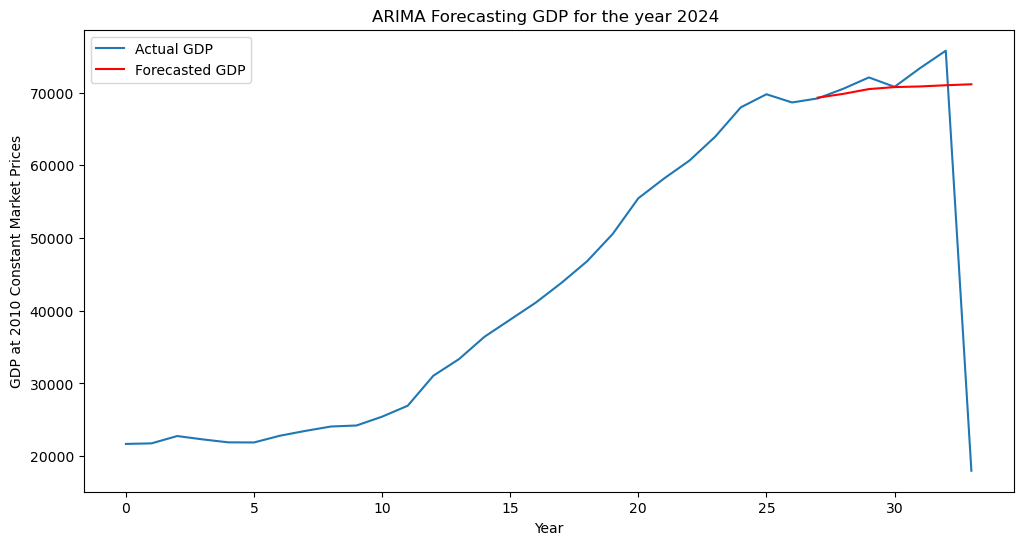

Root Mean Squared Error (RMSE): 20205.98352727894


In [21]:
# Split data into training and testing sets
train_size = int(len(nig) * 0.8)
train, test = nig['GDP at 2010 Constant Market Prices'][:train_size], nig['GDP at 2010 Constant Market Prices'][train_size:]

# Fit ARIMA model
order = (5, 1, 0)  # Example order, tune as needed
model = ARIMA(train, order=order)
fit_model = model.fit()

# Forecast future values
forecast = fit_model.forecast(steps=len(test))

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(nig.index, nig['GDP at 2010 Constant Market Prices'], label='Actual GDP')
plt.plot(test.index, forecast, label='Forecasted GDP', color='red')
plt.title('ARIMA Forecasting GDP for the year 2024 ')
plt.xlabel('Year')
plt.ylabel('GDP at 2010 Constant Market Prices')
plt.legend()
plt.show()

# Evaluate accuracy using Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(test, forecast))
print(f"Root Mean Squared Error (RMSE): {rmse}")

## GDP FORECASTING FOR YEAR 2024
7000


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


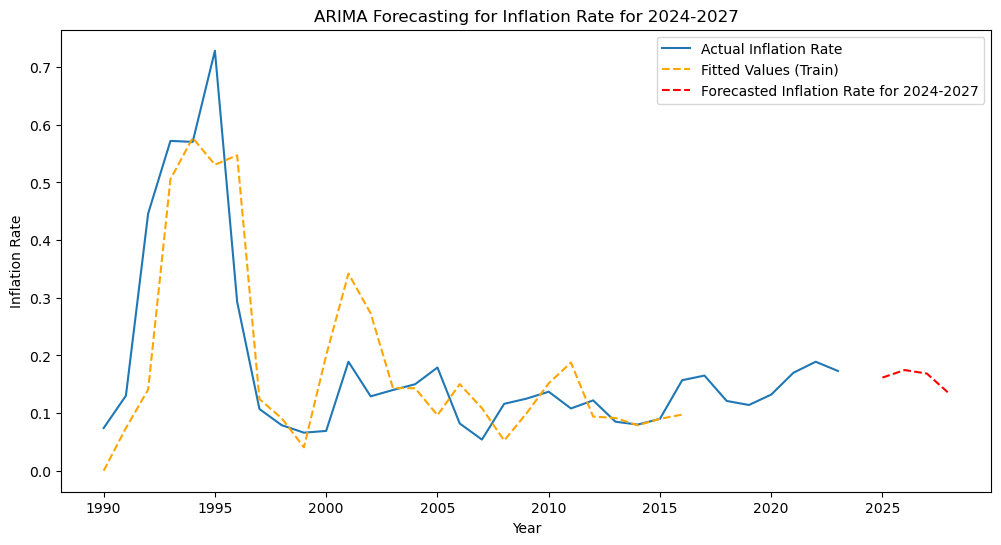

In [22]:
nig.set_index('Year', inplace=True)
# Split data into training and testing sets
train_size = int(len(nig) * 0.8)
train, test = nig['Inflation rate'][:train_size], nig['Inflation rate'][train_size:]

# Fit ARIMA model
order = (5, 1, 0)  # Example order tune as needed
model = ARIMA(train, order=order)
fit_model = model.fit()

# Forecast future value for the next 4 years
future_steps = 4
forecast_index = pd.date_range(nig.index[-1], periods=future_steps + 1, freq='Y')[1:]  # Start from the next year
forecast = fit_model.forecast(steps=future_steps)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(nig.index, nig['Inflation rate'], label='Actual Inflation Rate')
plt.plot(train.index, fit_model.fittedvalues, label='Fitted Values (Train)', linestyle='--', color='orange')
plt.plot(forecast_index, forecast, label='Forecasted Inflation Rate for 2024-2027', color='red', linestyle='dashed')
plt.title('ARIMA Forecasting for Inflation Rate for 2024-2027')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.legend()
plt.show()

Forecated inflation rate from the year 2024 to 2027 is between 0.1 to 0.2 